In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Load dataset
data = pd.read_csv("predictive_maintenance.csv")

In [17]:
# Check data integrity
print("Missing values per column:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())

Missing values per column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Duplicate rows: 0


In [19]:
# Define features and target
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'


In [21]:
# Correlation with target
print("\n📊 Correlation of features with Target:")
for feature in features:
    corr = data[feature].corr(data[target])
    print(f"{feature}: {corr:.4f}")



📊 Correlation of features with Target:
Air temperature [K]: 0.0826
Process temperature [K]: 0.0359
Rotational speed [rpm]: -0.0442
Torque [Nm]: 0.1913
Tool wear [min]: 0.1054


In [23]:
# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc * 100:.2f}%")


✅ Model Accuracy: 98.35%


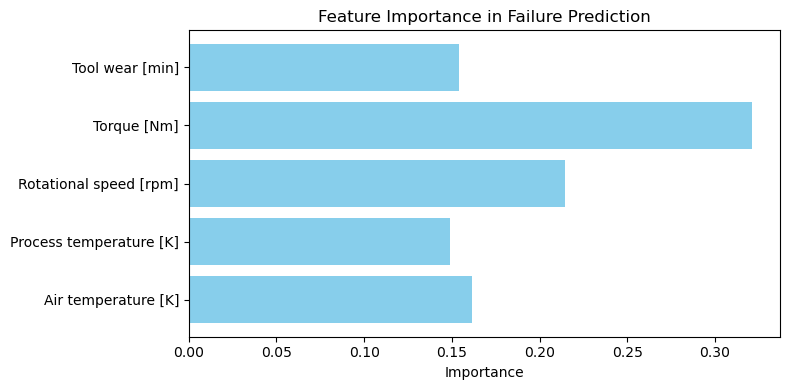

In [29]:
# Optional: Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Failure Prediction")
plt.tight_layout()
plt.show()

In [31]:
# Prediction function
def predict_failure():
    print("\nEnter machine parameters:")
    try:
        values = [
            float(input(f"  {feature}: ")) for feature in features
        ]
    except ValueError:
        print("❌ Invalid input. Please enter numeric values only.")
        return

    user_input = pd.DataFrame([values], columns=features)
    prediction = model.predict(user_input)[0]
    print("\n🔍 Prediction: ", "⚠️ Failure is likely!" if prediction == 1 else "✅ No failure predicted.")

In [33]:

# Main loop
def main():
    print("🔧 Machine Failure Prediction Tool 🔧")
    print("-------------------------------------")
    while True:
        predict_failure()
        cont = input("\nDo you want to predict again? (yes/no): ")
        if cont.lower() != "yes":
            print("\n👋 Exiting the tool. Goodbye!")
            break

In [35]:
# Entry point
if __name__ == "__main__":
    main()

🔧 Machine Failure Prediction Tool 🔧
-------------------------------------

Enter machine parameters:


  Air temperature [K]:  298.9	
  Process temperature [K]:  309	
  Rotational speed [rpm]:  1410
  Torque [Nm]:  65.7
  Tool wear [min]:  191



🔍 Prediction:  ⚠️ Failure is likely!



Do you want to predict again? (yes/no):  no



👋 Exiting the tool. Goodbye!
